## 세팅

In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import matplotlib.font_manager as fm
import matplotlib as mpl
import ast
import json
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

from collections import Counter
from kiwipiepy import Kiwi


In [25]:
def read_parquet_from_gcs(file_names, gcs_prefix, key_path):
    dfs = {}
    for name in file_names:
        path = f"{gcs_prefix}/{name}.parquet"
        dfs[name] = pd.read_parquet(path, storage_options={"token": key_path})
    return dfs


file_list = [
    "accounts_attendance",
    "accounts_blockrecord",
    "accounts_failpaymenthistory",
    "accounts_friendrequest",
    "accounts_group",
    "accounts_nearbyschool",
    "accounts_paymenthistory",
    "accounts_user_contacts",
    "accounts_pointhistory",
    "accounts_school",
    "accounts_timelinereport",
    "accounts_user",
    "accounts_userquestionrecord",
    "accounts_userwithdraw",
    "event_receipts",
    "events",
    "polls_question",
    "polls_questionpiece",
    "polls_questionreport",
    "polls_questionset",
    "polls_usercandidate"
]

gcs_prefix = "gs://codeit-project/votes"
key_path = "./config/key.json"

dfs = read_parquet_from_gcs(file_list, gcs_prefix, key_path)

# 출석 테이블
accounts_attendance = dfs["accounts_attendance"]

# 차단 기록 테이블
accounts_blockrecord = dfs["accounts_blockrecord"]

# 상품 구매 실패 기록 테이블
accounts_failpaymenthistory = dfs["accounts_failpaymenthistory"]

# 친구 요청 테이블
accounts_friendrequest = dfs["accounts_friendrequest"]

# 그룹 테이블
accounts_group = dfs["accounts_group"]

# 근처 학교 테이블
accounts_nearbyschool = dfs["accounts_nearbyschool"]

# 결제 기록 테이블
accounts_paymenthistory = dfs["accounts_paymenthistory"]

# 사용자 연락처 테이블
accounts_user_contacts = dfs["accounts_user_contacts"]

# 포인트 내역 테이블
accounts_pointhistory = dfs["accounts_pointhistory"]

# 학교 정보 테이블
accounts_school = dfs["accounts_school"]

# 타임라인 신고 기록 테이블
accounts_timelinereport = dfs["accounts_timelinereport"]

# 사용자 기본 정보 테이블
accounts_user = dfs["accounts_user"]

# 사용자 질문 응답 기록 테이블
accounts_userquestionrecord = dfs["accounts_userquestionrecord"]

# 회원 탈퇴 기록 테이블
accounts_userwithdraw = dfs["accounts_userwithdraw"]

# 이벤트 영수증 테이블
event_receipts = dfs["event_receipts"]

# 이벤트 테이블
events = dfs["events"]

# 질문 테이블
polls_question = dfs["polls_question"]

# 질문 조각 테이블
polls_questionpiece = dfs["polls_questionpiece"]

# 질문 신고 테이블
polls_questionreport = dfs["polls_questionreport"]

# 질문 세트 테이블
polls_questionset = dfs["polls_questionset"]

# 사용자 후보 응답 테이블
polls_usercandidate = dfs["polls_usercandidate"]

In [26]:
def read_parquet_from_gcs(file_names, gcs_prefix, key_path):
    dfs = {}
    for name in file_names:
        path = f"{gcs_prefix}/{name}.parquet"
        dfs[name] = pd.read_parquet(path, storage_options={"token": key_path})
    return dfs


file_list = [
    "device_properties",
    "hackle_events",
    "hackle_properties",
    "user_properties"
]

gcs_prefix = "gs://codeit-project/hackle"
key_path = "./config/key.json"

dfs = read_parquet_from_gcs(file_list, gcs_prefix, key_path)

# device_properties
device_properties = dfs["device_properties"]
# hackle_events
hackle_events = dfs["hackle_events"]
# hackle_properties
hackle_properties = dfs["hackle_properties"]
# user_properties
user_properties = dfs["user_properties"]    

## EDA

### 차단기록

In [4]:
# 확인
accounts_blockrecord.head()

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


In [5]:
display(accounts_blockrecord.info())
print('--------')
display(accounts_blockrecord.created_at.min())
print('--------')
display(accounts_blockrecord.created_at.max())
print('--------')
display(accounts_blockrecord.reason.nunique())
print('--------')
display(accounts_blockrecord.reason.value_counts())
print('--------')
display(accounts_blockrecord.user_id.nunique())
print('--------')
display(accounts_blockrecord.block_user_id.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB


None

--------


Timestamp('2023-05-04 23:01:53')

--------


Timestamp('2024-05-06 13:03:37')

--------


7

--------


reason
모르는 사람임               9640
친구 사이가 어색해짐           5805
사칭 계정                 2022
나랑 관련 없는 질문을 자꾸 보냄    1083
너무 많은 양의 질문을 보냄        919
기타                       7
그냥...                    6
Name: count, dtype: int64

--------


12552

--------


16240

### 신고기록

In [6]:
accounts_timelinereport.head()

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


In [7]:
display(accounts_timelinereport.info())
print('-----')
display(accounts_timelinereport.created_at.min())
print('-----')
display(accounts_timelinereport.created_at.max())
print('-----')
display(accounts_timelinereport.reason.nunique())
print('-----')
display(accounts_timelinereport.reason.unique())
print('-----')
display(accounts_timelinereport.reason.value_counts())
print('-----')
display(accounts_timelinereport.user_id.nunique())
print('-----')
display(accounts_timelinereport.reported_user_id.nunique())
print('-----')
display(accounts_timelinereport.user_question_record_id.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB


None

-----


Timestamp('2023-05-06 04:44:57')

-----


Timestamp('2023-06-02 08:30:06')

-----


5

-----


array(['타인을 사칭함', '친구를 비하하거나 조롱하는 어투', '허위 사실 언급', '선정적이거나 폭력적인 내용', '광고'],
      dtype=object)

-----


reason
허위 사실 언급             80
친구를 비하하거나 조롱하는 어투    64
선정적이거나 폭력적인 내용       39
타인을 사칭함              15
광고                   10
Name: count, dtype: int64

-----


115

-----


125

-----


163

### 유저기록

In [8]:
accounts_user.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [9]:
display(accounts_user.info())
print('-----')
display(accounts_user.created_at.min())
print('-----')
display(accounts_user.created_at.max())
# print('-----')
# display(accounts_user.reason.nunique())
# print('-----')
# display(accounts_user.reason.unique())
# print('-----')
# display(accounts_user.reason.value_counts())
print('-----')
display(accounts_user.id.nunique())
# print('-----')
# display(accounts_user.reported_user_id.nunique())
# print('-----')
# display(accounts_user.user_question_record_id.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 no

None

-----


Timestamp('2023-03-29 03:44:14.047130')

-----


Timestamp('2024-05-09 08:31:17.710824')

-----


677085

In [10]:
accounts_user['is_superuser'].value_counts()

is_superuser
0    677083
1         2
Name: count, dtype: int64

In [ ]:
accounts_user[accounts_user['is_superuser'] == 1]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
673996,1580626,1,0,M,300,[],1,2023-09-23 06:11:32.028322,[],[],N,0,0,0,0,122.0


In [ ]:
accounts_user['group_id'].nunique()

### 질문

In [ ]:
polls_question.head()

In [ ]:
polls_question.id.nunique()

In [ ]:
polls_question.id.value_counts()

In [ ]:
polls_question.id.max(), polls_question.id.min()

In [ ]:
polls_questionpiece.question_id.max(), polls_questionpiece.question_id.min()

In [ ]:
display(polls_question.info())
print('-----')
display(polls_question.created_at.min())
print('-----')
display(polls_question.created_at.max())
print('-----')
display(polls_question.question_text.nunique())

In [ ]:
display(polls_question.question_text.unique())

In [ ]:
polls_question.head(20)

In [ ]:
polls_question.question_text.value_counts()

#### polls 심화

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

- 시각화
type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('시도별 중고등학교 수', fontproperties=font_prop)

In [ ]:
# pip install kiwipiepy
# from kiwipiepy import Kiwi
# from collections import Counter

# 1. Kiwi 초기화
kiwi = Kiwi()

# 2. question_text 컬럼에서 명사 추출
nouns_all = []

for sentence in polls_question['question_text'].dropna():
    tokens = kiwi.tokenize(sentence)
    nouns = [token.form for token in tokens if token.tag.startswith('N') and len(token.form) > 1]
    nouns_all.extend(nouns)

# 3. 불용어 제거 (원하는 경우)
stopwords = ['사람', '친구', '학교', '누구', '이유', '경우', '여기', '우리', '나중', '제일']
filtered_nouns = [word for word in nouns_all if word not in stopwords]

# 4. 단어 빈도 계산
word_counts = Counter(filtered_nouns)
top_n = word_counts.most_common(30)

# 5. 결과 출력
print(top_n)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 6. 시각화 (막대 그래프)
words, counts = zip(*top_n)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.title("자주 등장한 명사 Top 30 (질문 텍스트 기준)", fontproperties=font_prop)
plt.ylabel("빈도수", fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [ ]:
top_n_df = pd.DataFrame(top_n, columns=['word', 'count'])
top_n_df.head()

### 질문에 대한 신고기록 테이블

In [ ]:
polls_questionreport.head()

In [ ]:
polls_questionreport.reason.value_counts()

In [ ]:
# pip install kiwipiepy
# from kiwipiepy import Kiwi
# from collections import Counter

# 1. Kiwi 초기화
kiwi = Kiwi()

# 2. question_text 컬럼에서 명사 추출
nouns_all = []

for sentence in polls_questionreport['reason'].dropna():
    tokens = kiwi.tokenize(sentence)
    nouns = [token.form for token in tokens if token.tag.startswith('N') and len(token.form) > 1]
    nouns_all.extend(nouns)

# 3. 불용어 제거 (원하는 경우)
stopwords = ['질문', '이', '포함', '내용', '이유', '경우', '생각', '우리', '친구', '최고']
filtered_nouns = [word for word in nouns_all if word not in stopwords]

# 4. 단어 빈도 계산
word_counts = Counter(filtered_nouns)
top_n = word_counts.most_common(30)

# 5. 결과 출력
print(top_n)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 6. 시각화 (막대 그래프)
words, counts = zip(*top_n)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.title("자주 등장한 명사 Top 30 (질문 텍스트 기준)", fontproperties=font_prop)
plt.ylabel("빈도수", fontproperties=font_prop)
plt.tight_layout()
plt.show()

### 질문 조각

In [ ]:
polls_questionpiece.head()

In [ ]:
polls_questionpiece.is_skipped.value_counts()

In [ ]:
polls_questionpiece.id.min(), polls_questionpiece.id.max()

In [ ]:
polls_questionpiece.question_id.min(), polls_questionpiece.question_id.max()

In [ ]:
print(polls_questionpiece['question_id'].value_counts()[252])
print(polls_questionpiece['question_id'].value_counts()[109])

In [ ]:
polls_questionpiece.question_id.nunique()

In [ ]:
polls_questionpiece.question_id.value_counts()

In [ ]:
polls_questionpiece.info()

In [ ]:
polls_questionpiece.question_id.nunique()

### 질문 세트 테이블

In [ ]:
polls_questionset.head()

In [ ]:
polls_questionset.created_at.min(), polls_questionset.created_at.max()

In [ ]:
polls_questionset.user_id.nunique()

In [ ]:
polls_questionset.question_piece_id_list

In [ ]:
polls_questionset.info()

In [ ]:
import ast

# 문자열을 리스트로 변환
polls_questionset['question_piece_id_list'] = polls_questionset['question_piece_id_list'].apply(ast.literal_eval)

# 리스트 전개
all_ids = []
for row in polls_questionset['question_piece_id_list']:
    all_ids.extend(row)

# 정수로 변환 (문자열로 되어있을 경우)
all_ids = [int(x) for x in all_ids]

# 등장 횟수 집계
question_count = Counter(all_ids)
top_question_ids = question_count.most_common(20)

# 결과 출력
print(top_question_ids)


### 질문 조각에 등장하는 유저들 테이블

In [ ]:
display(polls_usercandidate.head())
display(polls_usercandidate.info())

In [ ]:
polls_usercandidate.question_piece_id.nunique()

In [ ]:
polls_usercandidate.user_id.nunique()

### 학교 테이블

In [ ]:
accounts_school.head()

In [ ]:
display(accounts_school.info())
print('-----')
display(accounts_school.address.nunique())
print('-----')
display(accounts_school.school_type.value_counts())
print('-----')
display(accounts_school.student_count.min())
print('-----')
display(accounts_school.student_count.max())
print('-----')
display(accounts_school.student_count.mean())


In [ ]:
accounts_school['address'].value_counts()

In [ ]:
accounts_school['address'].unique()

In [ ]:
accounts_school[accounts_school['address'].str.startswith('대한')]['address'].value_counts()

In [ ]:
# 주소 통일

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^서울\s', '서울특별시 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^경기\s', '경기도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^강원\s', '강원도 ', regex=True
)
accounts_school['address'] = accounts_school['address'].str.replace(
    r'^강원도\s', '강원특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^충북\s', '충청북도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^충남\s', '충청남도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^전북\s', '전북특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^전라북도\s', '전북특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^전남\s', '전라남도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^경북\s', '경상북도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^경남\s', '경상남도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^대구\s', '대구광역시 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^인천\s', '인천광역시 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^제주\s', '제주특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^대한민국 강원도\s', '강원특별자치도 ', regex=True
)

In [ ]:
accounts_school[['province', 'city', 'district']] = accounts_school['address'].str.split(' ', n=2, expand=True)
accounts_school.tail(10)

In [ ]:
accounts_school.head(10)

In [ ]:
len(accounts_school[accounts_school['address'].str.startswith('-')]['address'])

In [ ]:
accounts_school.isna().sum()

In [ ]:
accounts_school = accounts_school[~accounts_school['address'].str.startswith('-')]

In [ ]:
accounts_school.reset_index(drop=True, inplace=True)
accounts_school.head()

In [ ]:
accounts_school[accounts_school['id'] == 99]

In [ ]:
accounts_school.school_type.value_counts()

In [ ]:
print(f"전체 학교 개수: {len(accounts_school)}")
print(f"학생 수가 0인 학교들: {len(accounts_school[accounts_school['student_count'] == 0])}")
print(f"학생 수가 0인 학교들 비율: {len(accounts_school[accounts_school['student_count'] == 0]) / len(accounts_school) * 100:.2f}%")
print('-----')
print(f"중학교 개수: {len(accounts_school[accounts_school['school_type'] == 'M'])}")
print(f"학생 수가 0인 중학교: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'M')])}")
print(f"학생 수가 0인 중학교 비율: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'M')]) / len(accounts_school[accounts_school['school_type'] == 'M']) * 100:.2f}%")
print('-----')
print(f"고등학교 개수: {len(accounts_school[accounts_school['school_type'] == 'H'])}")
print(f"학생 수가 0인 고등학교: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'H')])}")
print(f"학생 수가 0인 고등학교 비율: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'H')]) / len(accounts_school[accounts_school['school_type'] == 'H']) * 100:.2f}%")


In [ ]:
type_counts = accounts_school.groupby(['province', 'school_type']).size().unstack(fill_value=0)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('시도별 중고등학교 수', fontproperties=font_prop)
plt.xlabel('시/도 (province)', fontproperties=font_prop)
plt.ylabel('학교 수', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(title='school_type', prop=font_prop)
plt.tight_layout()
plt.show()


### 학급 테이블

In [ ]:
accounts_school.describe().round(2)

In [ ]:
accounts_school.head()

In [ ]:
accounts_group.head()

In [ ]:
accounts_group.sort_values(by = 'id', ascending = True, inplace = True)
accounts_group.head()

In [ ]:
accounts_user_contacts.head()

In [ ]:
accounts_group.school_id.nunique()

In [ ]:
accounts_group.describe()

### 구매기록

In [ ]:
accounts_paymenthistory.head()

In [ ]:
accounts_paymenthistory.describe(include='all')

In [ ]:
display(accounts_paymenthistory.info())
print('-----')
display(accounts_paymenthistory.created_at.min())
print('-----')
display(accounts_paymenthistory.created_at.max())
print('-----')
display(accounts_paymenthistory.productId.value_counts())
print('-----')
display(accounts_paymenthistory.phone_type.nunique())
print('-----')
display(accounts_paymenthistory.phone_type.value_counts())
print('-----')
display(accounts_paymenthistory.user_id.nunique())
print('-----')

In [ ]:
display(accounts_paymenthistory.user_id.value_counts().head(20))
display(accounts_paymenthistory.user_id.value_counts().mean())

### 포인트 기록 테이블

In [ ]:
accounts_pointhistory.head()

In [ ]:
display(accounts_pointhistory.info())
print('-----')
display(accounts_pointhistory.created_at.min())
print('-----')
display(accounts_pointhistory.created_at.max())
print('-----')
display(accounts_pointhistory.user_id.nunique())
print('-----')

In [ ]:
# 1527451
accounts_pointhistory[accounts_pointhistory['user_id'] == 1527451]

In [ ]:
# delta_point
print(accounts_pointhistory['delta_point'].min())
print(accounts_pointhistory['delta_point'].max())
print(accounts_pointhistory['delta_point'].mean())

In [ ]:
# user_id
print(accounts_pointhistory.user_id.min())
print(accounts_pointhistory.user_id.max())

### 투표 기록 테이블

In [ ]:
accounts_userquestionrecord.head()


In [ ]:
accounts_userquestionrecord.report_count.value_counts()

In [ ]:
print(accounts_userquestionrecord.user_id.nunique())
print(accounts_userquestionrecord.chosen_user_id.nunique())

In [ ]:
print(accounts_userquestionrecord.id.nunique()) # 질문id
print(accounts_userquestionrecord.question_piece_id.nunique())

In [ ]:
# user_id
display(accounts_pointhistory.user_id.value_counts().head(20))

In [ ]:
# question_id
accounts_userquestionrecord['question_id'].nunique()

In [ ]:
accounts_userquestionrecord.status.value_counts()

In [ ]:
accounts_userquestionrecord.created_at.min(), accounts_userquestionrecord.created_at.max()

In [ ]:
# has_read 값별 분포 (0 = 안읽음, 1 = 읽음)
has_read_counts = accounts_userquestionrecord['has_read'].value_counts().sort_index()

# 열람하지 않은 투표 비율
not_read_ratio = has_read_counts.get(0, 0) / len(accounts_userquestionrecord)

print("has_read")
print(has_read_counts)
print(f"열람하지 않은 비율: {not_read_ratio:.2%}")

In [ ]:

# 월 단위로 그룹화 (YYYY-MM 형식으로 변환)
accounts_userquestionrecord['month'] = accounts_userquestionrecord['created_at'].dt.to_period('M').astype(str)

# 월별 ID 개수 집계
monthly_counts = accounts_userquestionrecord.groupby('month')['id'].count().reset_index()

# 시각화
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


plt.figure(figsize=(10, 5))
plt.bar(monthly_counts['month'], monthly_counts['id'], color='skyblue')

# ✅ 모든 텍스트 요소에 font_prop 직접 지정
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.title('왜 계속 이래', fontsize=14, fontproperties=font_prop)
plt.xlabel('Month(YYYY-MM)', fontproperties=font_prop)
plt.ylabel('ID count', fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [ ]:
# 월별 ID 개수 테이블로 확인
monthly_counts = accounts_userquestionrecord.groupby('month')['id'].count().reset_index()
print(monthly_counts.sort_values('month'))

In [ ]:
accounts_userquestionrecord.id.nunique()

In [ ]:
accounts_userquestionrecord.question_id.nunique()

In [ ]:
accounts_userquestionrecord.user_id.nunique()

In [ ]:
# 3. 월별 has_read 값 개수 집계
monthly_read_counts = accounts_userquestionrecord.groupby(['month', 'has_read']).size().unstack(fill_value=0)
# 4. 열람하지 않은 비율 계산 (has_read == 0 비율)
monthly_read_counts['not_read_ratio'] = monthly_read_counts[0] / (monthly_read_counts[0] + monthly_read_counts[1])
# 결과 출력
print(monthly_read_counts)

In [ ]:
# 3. 월별 answer_status 분포
monthly_answer_status = accounts_userquestionrecord.groupby(['month', 'answer_status']).size().unstack(fill_value=0)

# 4. 미답변 비율 계산 (answer_status == 'N')
monthly_answer_status['not_answered_ratio'] = monthly_answer_status.get('N', 0) / monthly_answer_status.sum(axis=1)

# 결과 출력
print(monthly_answer_status)

In [ ]:
# 요일 (0=월 ~ 6=일), 시간대 (0~23시)
accounts_userquestionrecord['weekday'] = accounts_userquestionrecord['created_at'].dt.dayofweek
accounts_userquestionrecord['hour'] = accounts_userquestionrecord['created_at'].dt.hour

# 요일-시간대별 id 수
vote_heatmap = accounts_userquestionrecord.pivot_table(
    index='weekday', columns='hour', values='id', aggfunc='count', fill_value=0
)
vote_heatmap


In [ ]:
# 응답까지 걸린 시간 (초)
accounts_userquestionrecord['response_time_sec'] = (
    accounts_userquestionrecord['answer_updated_at'] - accounts_userquestionrecord['created_at']
).dt.total_seconds()

# 0초 이상 30일 이하만 필터링
valid_responses = accounts_userquestionrecord[
    (accounts_userquestionrecord['response_time_sec'] > 0) &
    (accounts_userquestionrecord['response_time_sec'] < 2592000)
]

# 기본 통계
print(valid_responses['response_time_sec'].describe())

# 평균 9시간

In [ ]:
# 열람률: has_read 평균
read_rate = accounts_userquestionrecord.groupby(['weekday', 'hour'])['has_read'].mean().unstack()
read_rate

In [ ]:
# 응답 여부 컬럼
accounts_userquestionrecord['is_answered'] = accounts_userquestionrecord['answer_status'] == 'A'

# 응답률: is_answered 평균
answer_rate = accounts_userquestionrecord.groupby(['weekday', 'hour'])['is_answered'].mean().unstack()

answer_rate

In [ ]:
last_active = accounts_userquestionrecord.groupby('user_id')['created_at'].max().reset_index()
last_active.columns = ['user_id', 'last_activity_at']

print(last_active.head())


In [ ]:
len(last_active)

In [ ]:
accounts_userquestionrecord.user_id.nunique()

In [ ]:
# 연-월(YYYY-MM) 단위로 변환
last_active['year_month'] = last_active['last_activity_at'].dt.to_period('M').astype(str)

# 연-월별 user 수 집계
monthly_last_active = last_active['year_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
monthly_last_active.plot(kind='bar', color='steelblue')
plt.title('last user activities')
plt.xlabel('Y-M')
plt.ylabel('users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
monthly_last_active

In [ ]:
accounts_userquestionrecord# 연-월 컬럼 생성
accounts_userquestionrecord['year_month'] = accounts_userquestionrecord['created_at'].dt.to_period('M').astype(str)

# 월별 신고 총합 계산
monthly_reports = accounts_userquestionrecord.groupby('year_month')['report_count'].sum()

plt.figure(figsize=(10, 5))
monthly_reports.plot(kind='bar', color='crimson')
plt.title('report_counts')
plt.xlabel('Y-M')
plt.ylabel('report counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
accounts_userquestionrecord.report_count.value_counts()

In [ ]:
monthly_reports

### 탈퇴

In [ ]:
# accounts_userwithdraw
accounts_userwithdraw = "gs://codeit-project/votes/accounts_userwithdraw.parquet" 

# GCP 키 경로
key_path = "config/key.json"

# 데이터 불러오기
accounts_userwithdraw = pd.read_parquet(accounts_userwithdraw, storage_options={"token": key_path})

# 확인
accounts_userwithdraw.head()

In [ ]:
len(accounts_userwithdraw)

In [ ]:
# 연-월 컬럼 생성
accounts_userwithdraw['year_month'] = accounts_userwithdraw['created_at'].dt.to_period('M').astype(str)

# 월별 탈퇴자 수 집계
monthly_withdraw_count = accounts_userwithdraw['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
monthly_withdraw_count.plot(kind='bar', color='tomato')
plt.title('withdrawn users')
plt.xlabel('Y-M')
plt.ylabel('withdrawn users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
monthly_withdraw_count

### hackle events

### 학교 별로 N명의 사용자를 확보하는 데 까지 걸린 날(일 기준)
- votes 중 accounts_attendance, hackle의 user_properties 사용

In [ ]:
# 10명
# 1. 출석일 리스트에서 가장 빠른 날짜만 추출하는 함수
def safe_min_date(date_list_str):
    try:
        date_list = ast.literal_eval(date_list_str)
        if isinstance(date_list, list) and len(date_list) > 0:
            return min(date_list)
        else:
            return None
    except Exception:
        return None

# 2. 출석 데이터에 최초 출석일 추가
accounts_attendance["first_attendance_date"] = accounts_attendance["attendance_date_list"].apply(safe_min_date)
accounts_attendance = accounts_attendance.dropna(subset=["first_attendance_date"])
accounts_attendance["first_attendance_date"] = pd.to_datetime(accounts_attendance["first_attendance_date"])


# user_id 컬럼의 자료형을 모두 문자열(str)로 통일
accounts_attendance["user_id"] = accounts_attendance["user_id"].astype(str)
user_properties["user_id"] = user_properties["user_id"].astype(str)

# 그 다음 병합
merged_df = accounts_attendance.merge(user_properties, on="user_id")


# 4. 학교별로 그룹핑 → 정렬 → 10번째 사용자까지 걸린 일수 계산
result_list = []

for school_id, group in merged_df.groupby("school_id"):
    group_sorted = group.sort_values("first_attendance_date").reset_index(drop=True)
    
    if len(group_sorted) >= 10:
        first_date = group_sorted.loc[0, "first_attendance_date"]
        tenth_date = group_sorted.loc[9, "first_attendance_date"]
        days_diff = (tenth_date - first_date).days
        
        result_list.append({
            "school_id": school_id,
            "first_user_id": group_sorted.loc[0, "user_id"],
            "first_date": first_date,
            "tenth_date": tenth_date,
            "days_to_10th_user": days_diff
        })

# 5. 결과 DataFrame 생성
result_df = pd.DataFrame(result_list)

# 6. 결과 확인
print(result_df.head())


   school_id first_user_id first_date tenth_date  days_to_10th_user
0          1        833041 2023-05-27 2023-06-06                 10
1          4       1241601 2023-05-27 2023-05-28                  1
2          5       1203993 2023-05-27 2023-05-29                  2
3          6       1219787 2023-05-27 2023-05-28                  1
4          7       1206795 2023-05-27 2023-05-28                  1


In [5]:
result_df.head(15)

,school_id,first_user_id,first_date,tenth_date,days_to_10th_user
0,1,833041,2023-05-27,2023-06-06,10
1,4,1241601,2023-05-27,2023-05-28,1
2,5,1203993,2023-05-27,2023-05-29,2
3,6,1219787,2023-05-27,2023-05-28,1
4,7,1206795,2023-05-27,2023-05-28,1
5,8,1294022,2023-05-27,2023-05-27,0
6,10,1311454,2023-05-27,2023-05-27,0
7,12,1398792,2023-05-27,2023-05-27,0
8,13,1268747,2023-05-27,2023-05-29,2
9,14,1385838,2023-05-27,2023-05-28,1


In [6]:
result_df.days_to_10th_user.describe()

count    3740.000000
mean        2.323262
std         9.015605
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max       147.000000
Name: days_to_10th_user, dtype: float64

In [10]:
# 20명
# 4. 학교별로 그룹핑 → 정렬 → 10번째 사용자까지 걸린 일수 계산
result_list = []

for school_id, group in merged_df.groupby("school_id"):
    group_sorted = group.sort_values("first_attendance_date").reset_index(drop=True)
    
    if len(group_sorted) >= 20:
        first_date = group_sorted.loc[0, "first_attendance_date"]
        tenth_date = group_sorted.loc[19, "first_attendance_date"]
        days_diff = (tenth_date - first_date).days
        
        result_list.append({
            "school_id": school_id,
            "first_user_id": group_sorted.loc[0, "user_id"],
            "first_date": first_date,
            "tenth_date": tenth_date,
            "days_to_20th_user": days_diff
        })

# 5. 결과 DataFrame 생성
result_df_20 = pd.DataFrame(result_list)

# 6. 결과 확인
print(result_df_20.head())

   school_id first_user_id first_date tenth_date  days_to_20th_user
0          4       1241601 2023-05-27 2023-05-30                  3
1          5       1203993 2023-05-27 2023-05-31                  4
2          6       1219787 2023-05-27 2023-05-29                  2
3          7       1206795 2023-05-27 2023-05-29                  2
4          8       1294022 2023-05-27 2023-05-28                  1


In [11]:
result_df_20.days_to_20th_user.describe()

count    3087.000000
mean        4.862650
std        13.674436
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max       238.000000
Name: days_to_20th_user, dtype: float64

In [12]:
# 30명
# 4. 학교별로 그룹핑 → 정렬 → 10번째 사용자까지 걸린 일수 계산
result_list = []

for school_id, group in merged_df.groupby("school_id"):
    group_sorted = group.sort_values("first_attendance_date").reset_index(drop=True)
    
    if len(group_sorted) >= 30:
        first_date = group_sorted.loc[0, "first_attendance_date"]
        tenth_date = group_sorted.loc[29, "first_attendance_date"]
        days_diff = (tenth_date - first_date).days
        
        result_list.append({
            "school_id": school_id,
            "first_user_id": group_sorted.loc[0, "user_id"],
            "first_date": first_date,
            "tenth_date": tenth_date,
            "days_to_30th_user": days_diff
        })

# 5. 결과 DataFrame 생성
result_df_30 = pd.DataFrame(result_list)

# 6. 결과 확인
print(result_df_30.head())

   school_id first_user_id first_date tenth_date  days_to_30th_user
0          4       1241601 2023-05-27 2023-08-07                 72
1          6       1219787 2023-05-27 2023-05-31                  4
2          7       1206795 2023-05-27 2023-05-30                  3
3          8       1294022 2023-05-27 2023-05-29                  2
4         10       1311454 2023-05-27 2023-05-28                  1


In [13]:
result_df_30.days_to_30th_user.describe()

count    2311.000000
mean        8.135439
std        20.626136
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max       335.000000
Name: days_to_30th_user, dtype: float64

In [35]:
# 함수화

# 1. 출석일 리스트에서 가장 빠른 날짜만 추출하는 함수
def safe_min_date(date_list_str):
    try:
        date_list = ast.literal_eval(date_list_str)
        if isinstance(date_list, list) and len(date_list) > 0:
            return min(date_list)
        else:
            return None
    except Exception:
        return None

# 2. n번째 사용자가 등장할 때까지 걸린 일수 계산 함수 (school_id 기준)
def calculate_spread_days(df, group_col="school_id", thresholds=[10, 20, 30, 40, 50, 100, 200, 300]):
    result = []

    for key, group in df.groupby(group_col):
        group_sorted = group.sort_values("first_attendance_date").reset_index(drop=True)
        row = {group_col: key}

        for n in thresholds:
            if len(group_sorted) >= n:
                first_date = group_sorted.loc[0, "first_attendance_date"]
                nth_date = group_sorted.loc[n - 1, "first_attendance_date"]
                row[f"days_to_{n}th_user"] = (nth_date - first_date).days
            else:
                row[f"days_to_{n}th_user"] = None  # 부족한 경우는 None 처리

        result.append(row)

    return pd.DataFrame(result)

# 3. 전처리 및 실행
# user_id 자료형 통일 (중요!)
accounts_attendance["user_id"] = accounts_attendance["user_id"].astype(str)
user_properties["user_id"] = user_properties["user_id"].astype(str)

# 출석일 전처리
accounts_attendance["first_attendance_date"] = accounts_attendance["attendance_date_list"].apply(safe_min_date)
accounts_attendance = accounts_attendance.dropna(subset=["first_attendance_date"])
accounts_attendance["first_attendance_date"] = pd.to_datetime(accounts_attendance["first_attendance_date"])

# 병합
merged_df = accounts_attendance.merge(user_properties, on="user_id")

# 확산 속도 분석 실행
result_df = calculate_spread_days(merged_df)

# 결과 확인
print(result_df.head())


   school_id  days_to_10th_user  days_to_20th_user  days_to_30th_user  days_to_40th_user  days_to_50th_user  days_to_100th_user days_to_200th_user days_to_300th_user
0          1               10.0                NaN                NaN                NaN                NaN                 NaN               None               None
1          4                1.0                3.0               72.0                NaN                NaN                 NaN               None               None
2          5                2.0                4.0                NaN                NaN                NaN                 NaN               None               None
3          6                1.0                2.0                4.0                NaN                NaN                 NaN               None               None
4          7                1.0                2.0                3.0                NaN                NaN                 NaN               None               None


In [36]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school_id           4624 non-null   int64  
 1   days_to_10th_user   3740 non-null   float64
 2   days_to_20th_user   3087 non-null   float64
 3   days_to_30th_user   2311 non-null   float64
 4   days_to_40th_user   1610 non-null   float64
 5   days_to_50th_user   1084 non-null   float64
 6   days_to_100th_user  55 non-null     float64
 7   days_to_200th_user  0 non-null      object 
 8   days_to_300th_user  0 non-null      object 
dtypes: float64(6), int64(1), object(2)
memory usage: 325.3+ KB


In [37]:
result_df.describe()

,school_id,days_to_10th_user,days_to_20th_user,days_to_30th_user,days_to_40th_user,days_to_50th_user,days_to_100th_user
count,4624.000000,3740.000000,3087.000000,2311.000000,1610.000000,1084.000000,55.000000
mean,3012.690528,2.323262,4.862650,8.135439,10.504348,13.136531,30.872727
std,1703.225009,9.015605,13.674436,20.626136,22.001476,24.910695,53.334047
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1586.750000,0.000000,1.000000,2.000000,2.000000,2.000000,4.000000
50%,3017.500000,1.000000,2.000000,2.000000,3.000000,3.000000,10.000000
75%,4523.250000,2.000000,2.000000,3.000000,6.000000,8.000000,30.000000
max,5964.000000,147.000000,238.000000,335.000000,208.000000,231.000000,271.000000


In [17]:
user_properties.head(1)

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885


In [18]:
school_user_counts = user_properties.groupby("school_id")["user_id"].nunique().reset_index()
school_user_counts.columns = ["school_id", "user_count"]
school_user_counts.head()

,school_id,user_count
0,1,29
1,4,74
2,5,50
3,6,65
4,7,53


In [20]:
school_user_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school_id   5023 non-null   int64
 1   user_count  5023 non-null   int64
dtypes: int64(2)
memory usage: 78.6 KB


In [19]:
school_user_counts.user_count.describe()

count    5023.000000
mean       45.952419
std        35.922645
min         1.000000
25%        15.000000
50%        41.000000
75%        69.000000
max       206.000000
Name: user_count, dtype: float64

In [ ]:
accounts_attendance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328692 entries, 0 to 349636
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     328692 non-null  int64         
 1   attendance_date_list   328692 non-null  object        
 2   user_id                328692 non-null  object        
 3   first_attendance_date  328692 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.5+ MB


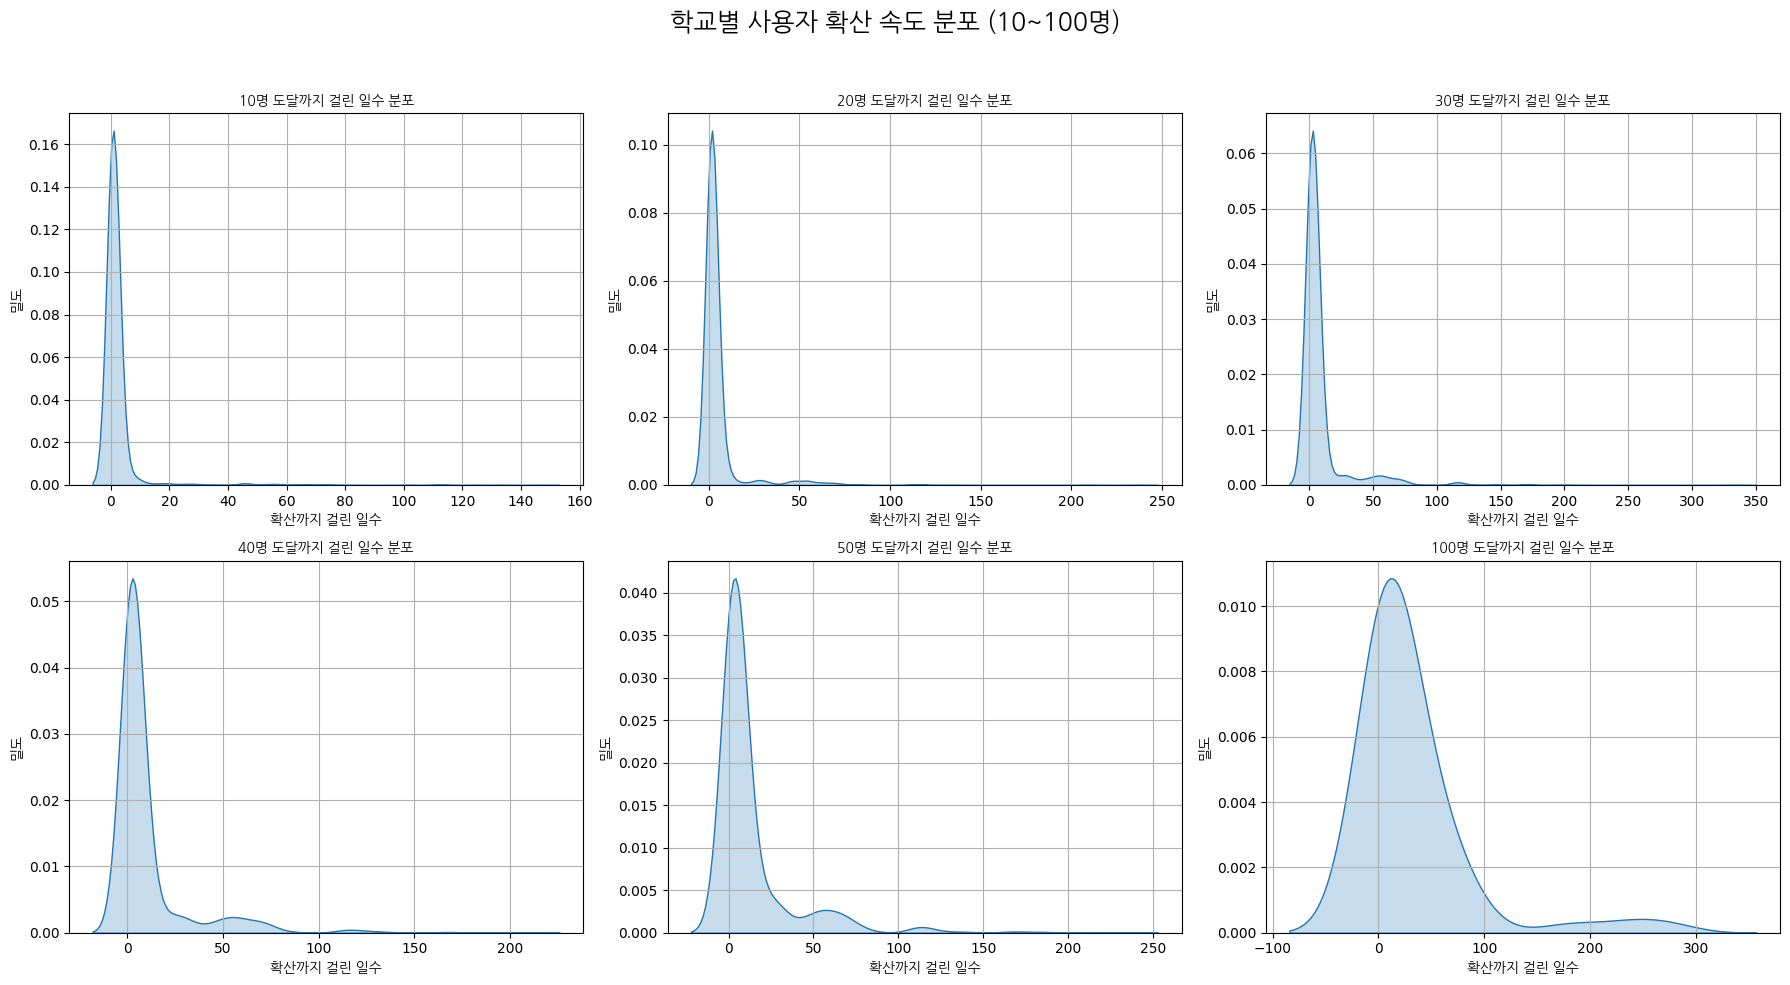

In [50]:
# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 확산 대상 리스트
thresholds = [10, 20, 30, 40, 50, 100]
cols = [f"days_to_{n}th_user" for n in thresholds]

# 서브플롯 구성: 2행 3열
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 각 그래프 개별 처리
for idx, col in enumerate(cols):
    if col in result_df.columns:
        sns.kdeplot(
            data=result_df,
            x=col,
            ax=axes[idx],
            bw_adjust=1.2,
            fill=True
        )
        axes[idx].set_title(f"{thresholds[idx]}명 도달까지 걸린 일수 분포", fontproperties=font_prop)
        axes[idx].set_xlabel("확산까지 걸린 일수", fontproperties=font_prop)
        axes[idx].set_ylabel("밀도", fontproperties=font_prop)
        axes[idx].grid(True)
    else:
        axes[idx].set_visible(False)  # 해당 데이터 없으면 subplot 숨김

# 전체 제목 + 정렬
plt.suptitle("학교별 사용자 확산 속도 분포 (10~100명)", fontsize=18, fontproperties=font_prop)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 학급별 확산속도

In [28]:
# 2. 학급 단위로 확산 속도 계산
def calculate_spread_days(df, group_cols=["school_id", "grade", "class"], thresholds=[10, 20, 30, 40, 50]):
    result = []

    for keys, group in df.groupby(group_cols):
        group_sorted = group.sort_values("first_attendance_date").reset_index(drop=True)
        row = dict(zip(group_cols, keys))  # school_id, grade, class 저장

        for n in thresholds:
            if len(group_sorted) >= n:
                first_date = group_sorted.loc[0, "first_attendance_date"]
                nth_date = group_sorted.loc[n - 1, "first_attendance_date"]
                row[f"days_to_{n}th_user"] = (nth_date - first_date).days
            else:
                row[f"days_to_{n}th_user"] = None

        result.append(row)

    return pd.DataFrame(result)

# 3. 데이터 전처리 및 병합
# user_id 형 변환
accounts_attendance["user_id"] = accounts_attendance["user_id"].astype(str)
user_properties["user_id"] = user_properties["user_id"].astype(str)

# 출석일 파싱 및 변환
accounts_attendance["first_attendance_date"] = accounts_attendance["attendance_date_list"].apply(safe_min_date)
accounts_attendance = accounts_attendance.dropna(subset=["first_attendance_date"])
accounts_attendance["first_attendance_date"] = pd.to_datetime(accounts_attendance["first_attendance_date"])

# 병합 (user_id 기준)
merged_df = accounts_attendance.merge(user_properties, on="user_id")

# 4. 학급 단위 확산 속도 계산 실행
result_df = calculate_spread_days(merged_df)

# 5. 결과 확인
print(result_df.head())

   school_id  grade  class  days_to_10th_user  days_to_20th_user  days_to_30th_user days_to_40th_user days_to_50th_user
0          1      1      1                NaN                NaN                NaN              None              None
1          1      1     20                NaN                NaN                NaN              None              None
2          1      3      1                NaN                NaN                NaN              None              None
3          1      3      2                NaN                NaN                NaN              None              None
4          1      3      3                NaN                NaN                NaN              None              None


### accounts_nearby를 이용해서 근처에 학교가 몇개 있는지 확인하고, 근처 학교 수가 많을수록 확산이 빠른지 확인해보기 

In [38]:
accounts_nearbyschool.head()

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7


In [44]:
accounts_nearbyschool.school_id.nunique()

5950

In [41]:
result_df.head()

,school_id,days_to_10th_user,days_to_20th_user,days_to_30th_user,days_to_40th_user,days_to_50th_user,days_to_100th_user,days_to_200th_user,days_to_300th_user
0,1,10.0,NaN,NaN,NaN,NaN,NaN,None,None
1,4,1.0,3.0,72.0,NaN,NaN,NaN,None,None
2,5,2.0,4.0,NaN,NaN,NaN,NaN,None,None
3,6,1.0,2.0,4.0,NaN,NaN,NaN,None,None
4,7,1.0,2.0,3.0,NaN,NaN,NaN,None,None
